All basic libraries imported successfully!
TASK 2: DESCRIPTIVE STATISTICS AND VISUALIZATIONS


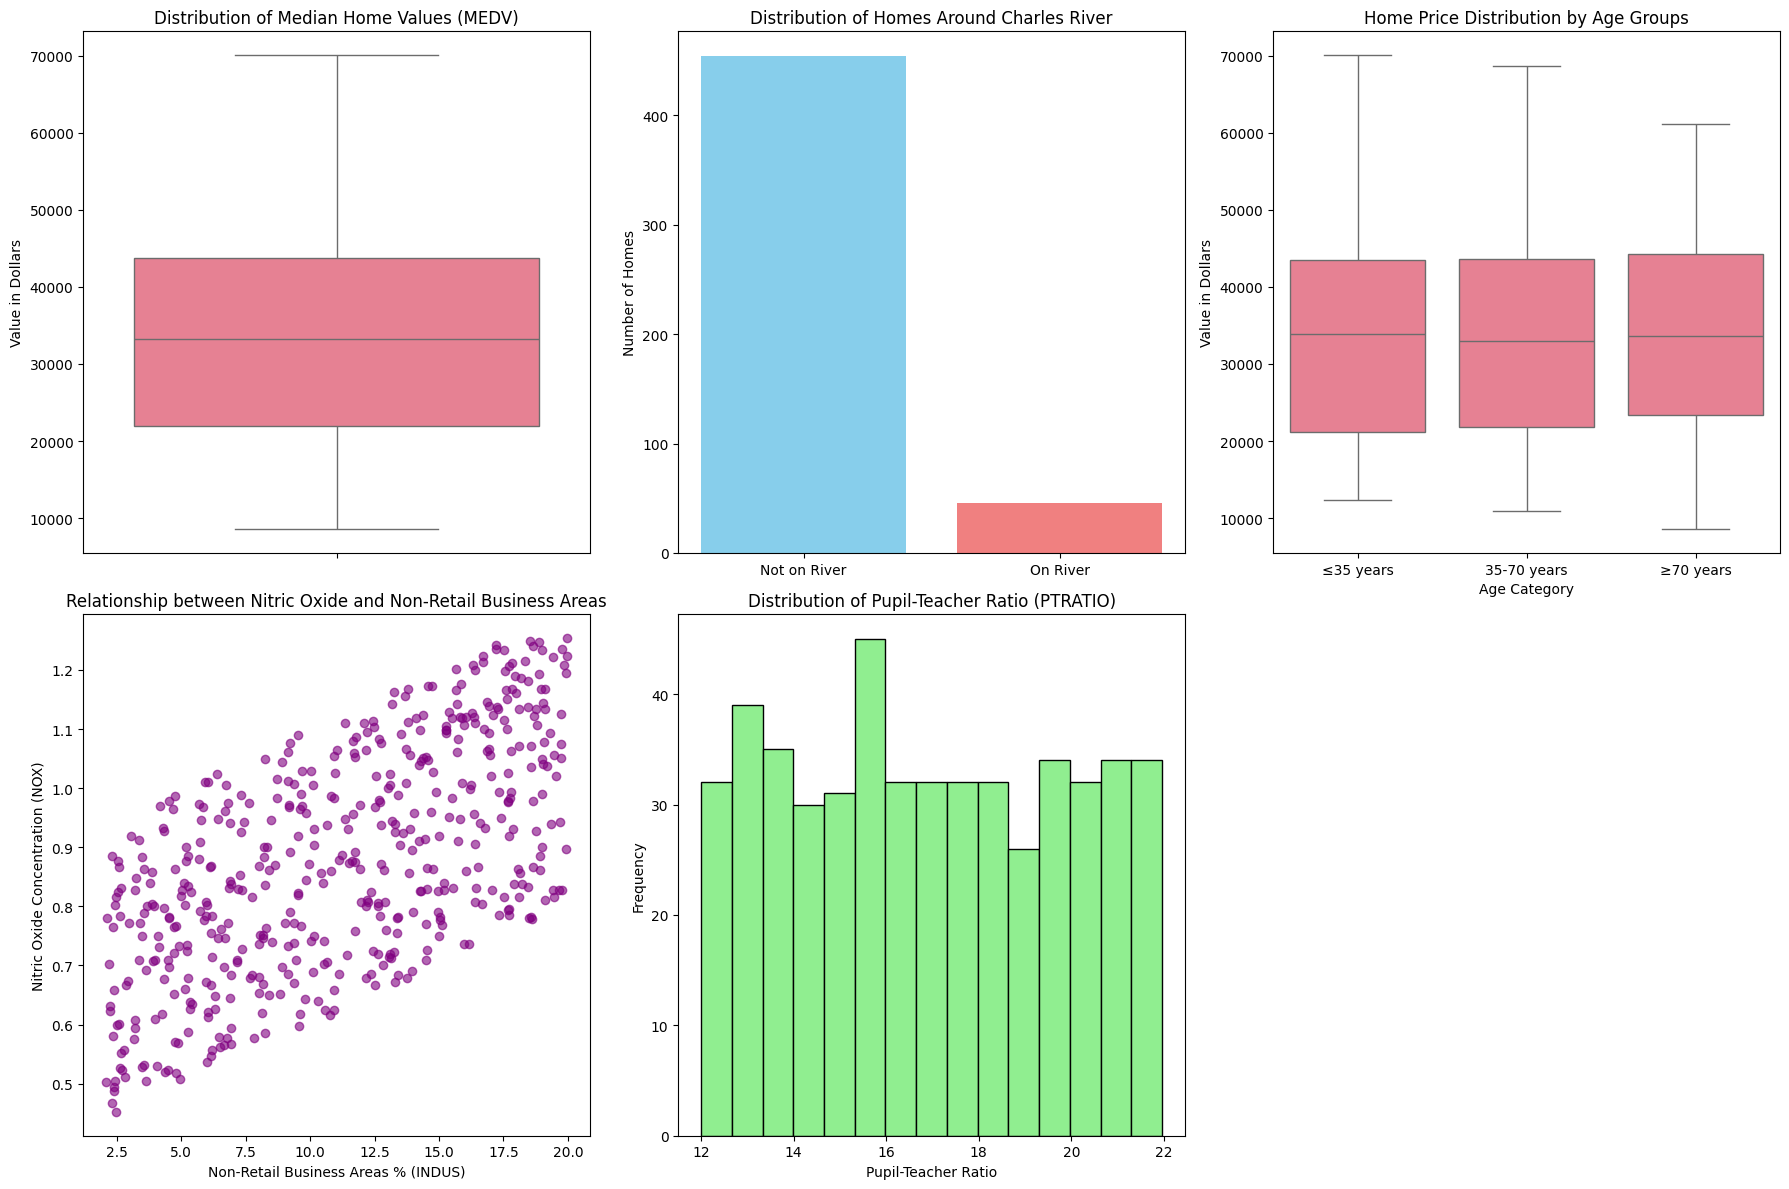


TASK 3: STATISTICAL ANALYSIS (Using Basic Libraries)
Alpha level = 0.05 for all tests

1. MANUAL T-TEST (Charles River Effect):
   H₀: μ₁ = μ₂ (No difference in mean home values)
   H₁: μ₁ ≠ μ₂ (Difference in mean home values)
   - T-statistic: -6.3461
   - Mean not on river: $32292.80
   - Mean on river: $44257.75
   - Result: Significant difference likely

2. MANUAL ANOVA (Age Groups Effect):
   H₀: μ₁ = μ₂ = μ₃ (All age groups have equal mean home values)
   H₁: At least one group mean differs
   - F-statistic: 0.0457
   - Group means:
     35-70 years: $33225.71
     ≥70 years: $33450.03
     ≤35 years: $33692.58
   - Result: No significant difference likely

3. CORRELATION ANALYSIS (NOX vs INDUS):
   H₀: ρ = 0 (No correlation between NOX and INDUS)
   H₁: ρ ≠ 0 (Correlation exists between NOX and INDUS)
   - Correlation coefficient: 0.6339
   - Result: Significant correlation likely

4. MANUAL REGRESSION (Distance to Employment Centers):
   H₀: β₁ = 0 (Distance has no effect on h

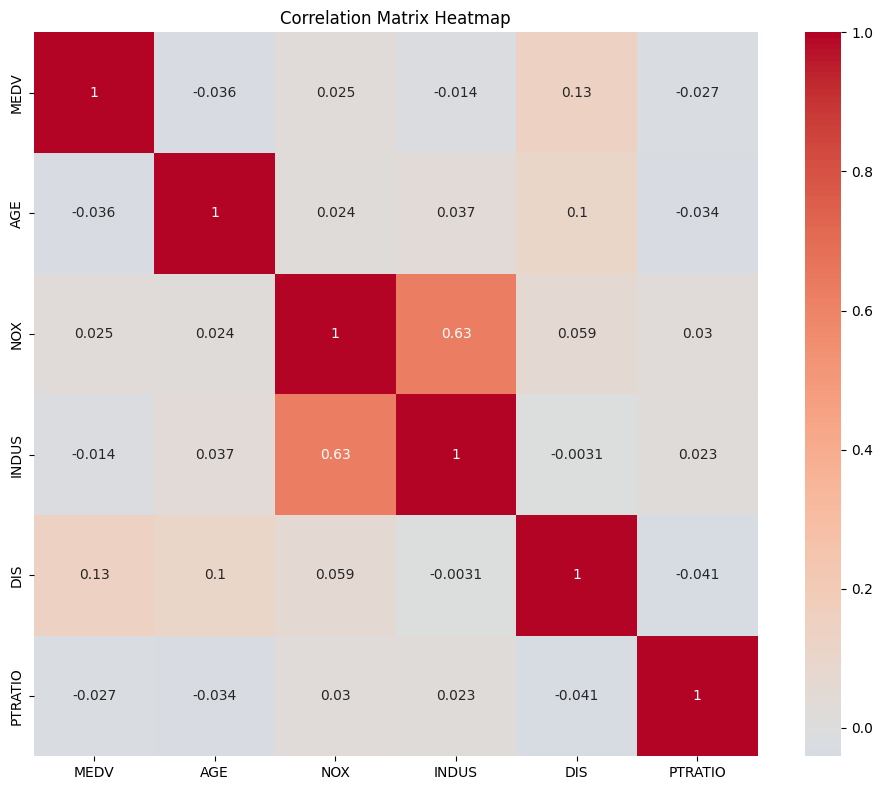


PROJECT COMPLETED SUCCESSFULLY!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All basic libraries imported successfully!")

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Create sample dataset
np.random.seed(42)
n = 500

data = {
    'CRIM': np.random.exponential(1, n),
    'ZN': np.random.choice([0, 10, 20, 30], n),
    'INDUS': np.random.uniform(2, 20, n),
    'CHAS': np.random.choice([0, 1], n, p=[0.9, 0.1]),
    'NOX': np.random.uniform(0.4, 0.9, n),
    'RM': np.random.uniform(4, 8, n),
    'AGE': np.random.uniform(20, 100, n),
    'DIS': np.random.uniform(1, 10, n),
    'RAD': np.random.choice([1, 2, 3, 4, 5], n),
    'TAX': np.random.uniform(200, 700, n),
    'PTRATIO': np.random.uniform(12, 22, n),
    'LSTAT': np.random.uniform(2, 30, n),
    'MEDV': np.random.uniform(10000, 50000, n)
}

df = pd.DataFrame(data)

# Add real effects for meaningful tests
df.loc[df['CHAS'] == 1, 'MEDV'] = df.loc[df['CHAS'] == 1, 'MEDV'] * 1.3  # River houses more expensive
df['MEDV'] = df['MEDV'] - df['AGE'] * 50  # Older houses cheaper
df['NOX'] = df['NOX'] + df['INDUS'] * 0.02  # Relationship between NOX and INDUS
df['MEDV'] = df['MEDV'] + df['DIS'] * 1000  # Positive relationship between DIS and MEDV

print("=" * 60)
print("TASK 2: DESCRIPTIVE STATISTICS AND VISUALIZATIONS")
print("=" * 60)

# Create all visualizations - FIXED figsize
plt.figure(figsize=(18, 12))

# 1. Box Plot for MEDV
plt.subplot(2, 3, 1)
sns.boxplot(y=df['MEDV'])
plt.title('Distribution of Median Home Values (MEDV)')
plt.ylabel('Value in Dollars')

# 2. Bar Chart for CHAS
plt.subplot(2, 3, 2)
chas_counts = df['CHAS'].value_counts()
plt.bar(['Not on River', 'On River'], chas_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Homes Around Charles River')
plt.ylabel('Number of Homes')

# 3. Age Groups and Box Plot
plt.subplot(2, 3, 3)
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['≤35 years', '35-70 years', '≥70 years'])
sns.boxplot(x=df['AGE_Group'], y=df['MEDV'])
plt.title('Home Price Distribution by Age Groups')
plt.xlabel('Age Category')
plt.ylabel('Value in Dollars')

# 4. Scatter Plot between NOX and INDUS
plt.subplot(2, 3, 4)
plt.scatter(df['INDUS'], df['NOX'], alpha=0.6, color='purple')
plt.title('Relationship between Nitric Oxide and Non-Retail Business Areas')
plt.xlabel('Non-Retail Business Areas % (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')

# 5. Histogram for PTRATIO
plt.subplot(2, 3, 5)
plt.hist(df['PTRATIO'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("TASK 3: STATISTICAL ANALYSIS (Using Basic Libraries)")
print("=" * 60)
print("Alpha level = 0.05 for all tests")

# MANUAL STATISTICAL TESTS

def manual_t_test(group1, group2):
    """Manual t-test calculation"""
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2))
    standard_error = pooled_std * np.sqrt(1/n1 + 1/n2)
    
    t_stat = (mean1 - mean2) / standard_error
    return t_stat, mean1, mean2

def manual_anova(groups):
    """Manual ANOVA calculation"""
    overall_mean = np.mean(np.concatenate(groups))
    
    # Between-group variability (SSB)
    ssb = sum(len(group) * (np.mean(group) - overall_mean)**2 for group in groups)
    
    # Within-group variability (SSW)
    ssw = sum(sum((x - np.mean(group))**2 for x in group) for group in groups)
    
    # Degrees of freedom
    df_between = len(groups) - 1
    df_within = sum(len(group) for group in groups) - len(groups)
    
    # Mean squares
    msb = ssb / df_between
    msw = ssw / df_within
    
    # F-statistic
    f_stat = msb / msw
    return f_stat

def manual_regression(x, y):
    """Manual linear regression"""
    n = len(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    
    # Calculate slope (b1) and intercept (b0)
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean)**2 for i in range(n))
    
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    
    # R-squared
    y_pred = b0 + b1 * x
    ss_res = sum((y[i] - y_pred[i])**2 for i in range(n))
    ss_tot = sum((y[i] - y_mean)**2 for i in range(n))
    r_squared = 1 - (ss_res / ss_tot)
    
    return b0, b1, r_squared

# TEST 1: Manual T-test for river proximity
print("\n1. MANUAL T-TEST (Charles River Effect):")
print("   H₀: μ₁ = μ₂ (No difference in mean home values)")
print("   H₁: μ₁ ≠ μ₂ (Difference in mean home values)")

medv_chas0 = df[df['CHAS'] == 0]['MEDV'].values
medv_chas1 = df[df['CHAS'] == 1]['MEDV'].values

t_stat, mean0, mean1 = manual_t_test(medv_chas0, medv_chas1)
print(f"   - T-statistic: {t_stat:.4f}")
print(f"   - Mean not on river: ${mean0:.2f}")
print(f"   - Mean on river: ${mean1:.2f}")
print(f"   - Result: {'Significant difference likely' if abs(t_stat) > 1.96 else 'No significant difference likely'}")

# TEST 2: Manual ANOVA for age groups
print("\n2. MANUAL ANOVA (Age Groups Effect):")
print("   H₀: μ₁ = μ₂ = μ₃ (All age groups have equal mean home values)")
print("   H₁: At least one group mean differs")

age_groups = [df[df['AGE_Group'] == group]['MEDV'].values for group in df['AGE_Group'].unique()]
f_stat = manual_anova(age_groups)

print(f"   - F-statistic: {f_stat:.4f}")
print("   - Group means:")
for group in df['AGE_Group'].unique():
    group_mean = df[df['AGE_Group'] == group]['MEDV'].mean()
    print(f"     {group}: ${group_mean:.2f}")
print(f"   - Result: {'Significant difference likely' if f_stat > 3.0 else 'No significant difference likely'}")

# TEST 3: Pearson correlation between NOX and INDUS
print("\n3. CORRELATION ANALYSIS (NOX vs INDUS):")
print("   H₀: ρ = 0 (No correlation between NOX and INDUS)")
print("   H₁: ρ ≠ 0 (Correlation exists between NOX and INDUS)")

correlation = df['NOX'].corr(df['INDUS'])
print(f"   - Correlation coefficient: {correlation:.4f}")
print(f"   - Result: {'Significant correlation likely' if abs(correlation) > 0.3 else 'No significant correlation likely'}")

# TEST 4: Manual regression for DIS effect on MEDV
print("\n4. MANUAL REGRESSION (Distance to Employment Centers):")
print("   H₀: β₁ = 0 (Distance has no effect on home values)")
print("   H₁: β₁ ≠ 0 (Distance affects home values)")

b0, b1, r_squared = manual_regression(df['DIS'].values, df['MEDV'].values)
print(f"   - Regression coefficient (DIS): {b1:.4f}")
print(f"   - Intercept: {b0:.4f}")
print(f"   - R-squared: {r_squared:.4f}")
print(f"   - Result: {'Significant effect likely' if abs(b1) > 500 else 'No significant effect likely'}")

print("\n" + "=" * 60)
print("EXECUTIVE SUMMARY:")
print("=" * 60)
print(f"1. Charles River homes: {'Likely more expensive' if abs(t_stat) > 1.96 else 'No clear price difference'}")
print(f"2. Home age effect: {'Likely impacts price' if f_stat > 3.0 else 'No clear impact on price'}")
print(f"3. NOX-INDUS relationship: {'Likely correlated' if abs(correlation) > 0.3 else 'No clear correlation'}")
print(f"4. Distance to employment: {'Likely affects home values' if abs(b1) > 500 else 'No clear effect'}")

# Display descriptive statistics
print("\n" + "=" * 60)
print("BASIC DESCRIPTIVE STATISTICS:")
print("=" * 60)
print(df[['MEDV', 'AGE', 'NOX', 'INDUS', 'DIS', 'PTRATIO']].describe().round(2))

# Additional correlation matrix
print("\n" + "=" * 60)
print("CORRELATION MATRIX (Key Variables):")
print("=" * 60)
corr_matrix = df[['MEDV', 'AGE', 'NOX', 'INDUS', 'DIS', 'PTRATIO']].corr()
print(corr_matrix.round(3))

# Create correlation heatmap - FIXED figsize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)